In [3]:
import splitting as sp
import train
from pruning_utils.prune import *
from pruning_utils.pruners import *
from pruning_utils.generator import *

In [4]:
import torch
import torch.nn as nn


### Multi-tier MON, CIFAR-10

In [2]:
trainLoader, testLoader = train.cifar_loaders(train_batch_size=128, test_batch_size=400, augment=False)

train.train(trainLoader, testLoader,
      train.MultiConvNet(sp.MONPeacemanRachford,
                        in_dim=32,
                        in_channels=3,
                        conv_sizes=(16,32,60),
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0),
        max_lr=1e-2,
        lr_mode='step',
        step=10,
        change_mo=False,
#         epochs=40,
        epochs=1,
        print_freq=100,
        tune_alpha=True)

Files already downloaded and verified
----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 10
alpha: 0.5	 iters: 9
alpha: 0.25	 iters: 12
setting to:  0.5
--------------

Train Epoch: 0.26 [12928/50000 (26%)]	Loss: 1.8413	Error: 65.62
Fwd iters: 8.56	Fwd Time: 0.0957	Bkwd Iters: 8.68	Bkwd Time: 0.1391

----tuning alpha----
current:  0.5
alpha: 1.0	 iters: 11
alpha: 0.5	 iters: 9
alpha: 0.25	 iters: 12
setting to:  0.5
--------------

Train Epoch: 0.51 [25728/50000 (51%)]	Loss: 1.6348	Error: 59.38
Fwd iters: 9.00	Fwd Time: 0.0979	Bkwd Iters: 8.00	Bkwd Time: 0.1323

Train Epoch: 0.77 [38528/50000 (77%)]	Loss: 1.3809	Error: 46.09
Fwd iters: 9.47	Fwd Time: 0.1019	Bkwd Iters: 8.03	Bkwd Time: 0.1292

Tot train time: 106.92895436286926


Test set: Average loss: 1.3093, Error: 4600/10000 (46.00%)
Tot test time: 8.091797351837158






### Single convolution MON, CIFAR-10

In [2]:
trainLoader, testLoader = train.cifar_loaders(train_batch_size=128, test_batch_size=400, augment=False)

train.train(trainLoader, testLoader,
      train.SingleConvNet(sp.MONPeacemanRachford,
                        in_dim=32,
                        in_channels=3,
                        out_channels=81,
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0),
        max_lr=1e-3,
        lr_mode='step',
        step=25,
        change_mo=False,
#         epochs=40,
        epochs=1,
        print_freq=100,
        tune_alpha=True)

Files already downloaded and verified


TypeError: fft_rfft() got an unexpected keyword argument 'onesided'

### Multi-tier MON, CIFAR-10 + data augmentation

In [4]:
trainLoader, testLoader = train.cifar_loaders(train_batch_size=128, test_batch_size=400, augment=True)

train.train(trainLoader, testLoader,
      train.MultiConvNet(sp.MONPeacemanRachford,
                        in_dim=32,
                        in_channels=3,
                        conv_sizes=(64,128,128),
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0),
        max_lr=0.05,
        lr_mode='1cycle',
        change_mo=True,
#         epochs=65,
        epochs=1,
        print_freq=100,
        tune_alpha=True)

Files already downloaded and verified
----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 7
alpha: 0.5	 iters: 7
alpha: 0.25	 iters: 12
setting to:  0.5
--------------

Train Epoch: 0.26 [12928/50000 (26%)]	Loss: 1.9840	Error: 75.00
Fwd iters: 7.70	Fwd Time: 0.3544	Bkwd Iters: 7.99	Bkwd Time: 0.4853

----tuning alpha----
current:  0.5
alpha: 1.0	 iters: 8
alpha: 0.5	 iters: 7
alpha: 0.25	 iters: 11
setting to:  0.5
--------------

Train Epoch: 0.51 [25728/50000 (51%)]	Loss: 1.8562	Error: 67.97
Fwd iters: 7.00	Fwd Time: 0.3321	Bkwd Iters: 8.00	Bkwd Time: 0.4866

Train Epoch: 0.77 [38528/50000 (77%)]	Loss: 1.7976	Error: 60.94
Fwd iters: 7.81	Fwd Time: 0.3585	Bkwd Iters: 8.00	Bkwd Time: 0.4870

Tot train time: 358.17819261550903


Test set: Average loss: 1.5719, Error: 5797/10000 (57.97%)
Tot test time: 23.59424901008606






### Single convolution MON, CIFAR-10 + data augmentation

In [5]:
trainLoader, testLoader = train.cifar_loaders(train_batch_size=128, test_batch_size=400, augment=True)

train.train(trainLoader, testLoader,
      train.SingleConvNet(sp.MONPeacemanRachford,
                        in_dim=32,
                        in_channels=3,
                        out_channels=200,
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0),
        max_lr=1e-2,
        lr_mode='1cycle',
        change_mo=True,
#         epochs=65,
        epochs=1,
        print_freq=100,
        tune_alpha=True)

Files already downloaded and verified
----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 6
alpha: 0.5	 iters: 6
alpha: 0.25	 iters: 8
setting to:  0.5
--------------

Train Epoch: 0.26 [12928/50000 (26%)]	Loss: 1.4396	Error: 50.78
Fwd iters: 6.00	Fwd Time: 0.4187	Bkwd Iters: 6.00	Bkwd Time: 0.4716

----tuning alpha----
current:  0.5
alpha: 1.0	 iters: 6
alpha: 0.5	 iters: 6
alpha: 0.25	 iters: 8
setting to:  0.5
--------------

Train Epoch: 0.51 [25728/50000 (51%)]	Loss: 1.4426	Error: 49.22
Fwd iters: 6.00	Fwd Time: 0.4179	Bkwd Iters: 6.00	Bkwd Time: 0.4705

Train Epoch: 0.77 [38528/50000 (77%)]	Loss: 1.4308	Error: 51.56
Fwd iters: 6.00	Fwd Time: 0.4195	Bkwd Iters: 6.00	Bkwd Time: 0.4716

Tot train time: 383.9007320404053


Test set: Average loss: 1.2711, Error: 4491/10000 (44.91%)
Tot test time: 25.07926917076111






### Multi-tier MON, SVHN

In [6]:
trainLoader, testLoader = train.svhn_loaders(train_batch_size=128, test_batch_size=400)

train.train(trainLoader, testLoader,
      train.MultiConvNet(sp.MONPeacemanRachford,
                        in_dim=32,
                        in_channels=3,
                        conv_sizes=(16,32,60),
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0),
        max_lr=1e-3,
        lr_mode='step',
        step=10,
        change_mo=False,
#         epochs=40,
        epochs=1,
        print_freq=100,
        tune_alpha=True)

Using downloaded and verified file: data/train_32x32.mat
Using downloaded and verified file: data/test_32x32.mat
----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 7
alpha: 0.5	 iters: 8
setting to:  1.0
--------------

Train Epoch: 0.17 [12928/73257 (17%)]	Loss: 2.2158	Error: 78.91
Fwd iters: 6.99	Fwd Time: 0.0829	Bkwd Iters: 7.32	Bkwd Time: 0.1166

Train Epoch: 0.35 [25728/73257 (35%)]	Loss: 1.8257	Error: 64.84
Fwd iters: 8.17	Fwd Time: 0.0918	Bkwd Iters: 10.15	Bkwd Time: 0.1582

----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 9
alpha: 0.5	 iters: 8
alpha: 0.25	 iters: 12
setting to:  0.5
--------------

Train Epoch: 0.52 [38528/73257 (52%)]	Loss: 1.2114	Error: 36.72
Fwd iters: 8.00	Fwd Time: 0.0945	Bkwd Iters: 8.00	Bkwd Time: 0.1257

Train Epoch: 0.70 [51328/73257 (70%)]	Loss: 0.8822	Error: 22.66
Fwd iters: 8.00	Fwd Time: 0.0920	Bkwd Iters: 8.00	Bkwd Time: 0.1258

Train Epoch: 0.87 [64128/73257 (87%)]	Loss: 0.9077	Error: 23.44
Fwd iters: 8.00	Fwd Time: 0.0910	Bkwd Iters: 8.

### Single convolution MON, SVHN

In [7]:
trainLoader, testLoader = train.svhn_loaders(train_batch_size=128, test_batch_size=400)

train.train(trainLoader, testLoader,
      train.SingleConvNet(sp.MONPeacemanRachford,
                        in_dim=32,
                        in_channels=3,
                        out_channels=81,
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0),
        max_lr=1e-3,
        lr_mode='step',
        step=25,
        change_mo=False,
#         epochs=40,
        epochs=1,
        print_freq=100,
        tune_alpha=True)

Using downloaded and verified file: data/train_32x32.mat
Using downloaded and verified file: data/test_32x32.mat
----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 5
alpha: 0.5	 iters: 5
alpha: 0.25	 iters: 8
setting to:  0.5
--------------

Train Epoch: 0.17 [12928/73257 (17%)]	Loss: 1.6229	Error: 43.75
Fwd iters: 5.18	Fwd Time: 0.0974	Bkwd Iters: 6.00	Bkwd Time: 0.1792

Train Epoch: 0.35 [25728/73257 (35%)]	Loss: 0.9959	Error: 29.69
Fwd iters: 6.00	Fwd Time: 0.1071	Bkwd Iters: 6.00	Bkwd Time: 0.1767

----tuning alpha----
current:  0.5
alpha: 1.0	 iters: 5
alpha: 0.5	 iters: 6
setting to:  1.0
--------------

Train Epoch: 0.52 [38528/73257 (52%)]	Loss: 0.9007	Error: 28.91
Fwd iters: 5.13	Fwd Time: 0.0966	Bkwd Iters: 5.00	Bkwd Time: 0.1495

Train Epoch: 0.70 [51328/73257 (70%)]	Loss: 0.7787	Error: 24.22
Fwd iters: 5.75	Fwd Time: 0.1035	Bkwd Iters: 5.14	Bkwd Time: 0.1533

Train Epoch: 0.87 [64128/73257 (87%)]	Loss: 0.7090	Error: 19.53
Fwd iters: 6.00	Fwd Time: 0.1058	Bkwd Iters: 5.95

### Multi-tier MON, MNIST

In [8]:
trainLoader, testLoader = train.mnist_loaders(train_batch_size=128, test_batch_size=400)

train.train(trainLoader, testLoader,
      train.MultiConvNet(sp.MONPeacemanRachford,
                        in_dim=28,
                        in_channels=1,
                        conv_sizes=(16,32,32),
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0),
        max_lr=1e-3,
        lr_mode='step',
        step=10,
        change_mo=False,
#         epochs=40,
        epochs=1,
        print_freq=100,
        tune_alpha=True)

----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 9
alpha: 0.5	 iters: 7
alpha: 0.25	 iters: 11
setting to:  0.5
--------------

Train Epoch: 0.21 [12928/60000 (21%)]	Loss: 0.2957	Error: 8.59
Fwd iters: 7.00	Fwd Time: 0.0668	Bkwd Iters: 7.03	Bkwd Time: 0.0880

Train Epoch: 0.43 [25728/60000 (43%)]	Loss: 0.2262	Error: 6.25
Fwd iters: 7.00	Fwd Time: 0.0686	Bkwd Iters: 7.97	Bkwd Time: 0.1009

----tuning alpha----
current:  0.5
alpha: 1.0	 iters: 9
alpha: 0.5	 iters: 7
alpha: 0.25	 iters: 11
setting to:  0.5
--------------

Train Epoch: 0.64 [38528/60000 (64%)]	Loss: 0.0849	Error: 0.78
Fwd iters: 7.00	Fwd Time: 0.0666	Bkwd Iters: 8.00	Bkwd Time: 0.1000

Train Epoch: 0.85 [51328/60000 (85%)]	Loss: 0.2064	Error: 5.47
Fwd iters: 7.00	Fwd Time: 0.0698	Bkwd Iters: 8.00	Bkwd Time: 0.1030

Tot train time: 95.81319689750671


Test set: Average loss: 0.1206, Error: 369/10000 (3.69%)
Tot test time: 4.875991582870483






### Single convolution MON, MNIST

In [9]:
trainLoader, testLoader = train.mnist_loaders(train_batch_size=128, test_batch_size=400)

train.train(trainLoader, testLoader,
      train.SingleConvNet(sp.MONPeacemanRachford,
                        in_dim=28,
                        in_channels=1,
                        out_channels=54,
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0),
        max_lr=1e-3,
        lr_mode='step',
        step=10,
        change_mo=False,
#         epochs=40,
        epochs=1,
        print_freq=100,
        tune_alpha=True)

----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 5
alpha: 0.5	 iters: 6
setting to:  1.0
--------------

Train Epoch: 0.21 [12928/60000 (21%)]	Loss: 0.2081	Error: 4.69
Fwd iters: 5.00	Fwd Time: 0.0431	Bkwd Iters: 5.00	Bkwd Time: 0.0763

Train Epoch: 0.43 [25728/60000 (43%)]	Loss: 0.1635	Error: 3.12
Fwd iters: 5.00	Fwd Time: 0.0419	Bkwd Iters: 5.06	Bkwd Time: 0.0767

----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 5
alpha: 0.5	 iters: 6
setting to:  1.0
--------------

Train Epoch: 0.64 [38528/60000 (64%)]	Loss: 0.2346	Error: 6.25
Fwd iters: 5.00	Fwd Time: 0.0418	Bkwd Iters: 5.97	Bkwd Time: 0.0893

Train Epoch: 0.85 [51328/60000 (85%)]	Loss: 0.1615	Error: 7.03
Fwd iters: 5.00	Fwd Time: 0.0418	Bkwd Iters: 6.00	Bkwd Time: 0.0898

Tot train time: 72.66634154319763


Test set: Average loss: 0.0938, Error: 256/10000 (2.56%)
Tot test time: 4.002958536148071






### Single fully-connected MON, MNIST

In [11]:
trainLoader, testLoader = train.mnist_loaders(train_batch_size=128, test_batch_size=400)

train.train(trainLoader, testLoader,
      train.SingleFcNet(sp.MONPeacemanRachford,
                        in_dim=28**2,
                        out_dim=87,
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0),
        max_lr=1e-3,
        lr_mode='step',
        step=10,
        change_mo=False,
#         epochs=40,
        epochs=1,
        print_freq=100,
        tune_alpha=True)


----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 6
alpha: 0.5	 iters: 6
alpha: 0.25	 iters: 9
setting to:  0.5
--------------

Train Epoch: 0.21 [12928/60000 (21%)]	Loss: 0.3294	Error: 12.50
Fwd iters: 6.00	Fwd Time: 0.0127	Bkwd Iters: 6.00	Bkwd Time: 0.0062

Train Epoch: 0.43 [25728/60000 (43%)]	Loss: 0.4375	Error: 10.94
Fwd iters: 6.00	Fwd Time: 0.0123	Bkwd Iters: 6.00	Bkwd Time: 0.0060

----tuning alpha----
current:  0.5
alpha: 1.0	 iters: 6
alpha: 0.5	 iters: 6
alpha: 0.25	 iters: 9
setting to:  0.5
--------------

Train Epoch: 0.64 [38528/60000 (64%)]	Loss: 0.2073	Error: 7.03
Fwd iters: 6.00	Fwd Time: 0.0119	Bkwd Iters: 6.00	Bkwd Time: 0.0060

Train Epoch: 0.85 [51328/60000 (85%)]	Loss: 0.1452	Error: 3.91
Fwd iters: 6.00	Fwd Time: 0.0123	Bkwd Iters: 6.00	Bkwd Time: 0.0060

Tot train time: 23.067858457565308


Test set: Average loss: 0.1840, Error: 557/10000 (5.57%)
Tot test time: 2.1772100925445557






# Masked single fully-connected MonDEQ

In [3]:
trainLoader, testLoader = train.mnist_loaders(train_batch_size=128, test_batch_size=400)

model = train.SingleFcNet(sp.MONPeacemanRachford,
                        in_dim=28**2,
                        out_dim=1000,
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0,
                        is_pruning=True)

# print('Pruning with {} for {} epochs.'.format(args.pruner, args.prune_epochs))
masked_parameters_ = masked_parameters(model)
pruner = Mag(masked_parameters_)

compression = 0

# args.compression = 10**(arg.compression)
sparsity = 10**(-float(compression))
prune_loop(model, None, pruner, None, 'cpu', sparsity, schedule='exponential', scope='global', epochs=1,
               reinitialize=False, train_mode=False, shuffle=False, invert=False,)

train.train(trainLoader, testLoader,
            model,
            max_lr=1e-3,
            lr_mode='step',
            step=10,
            change_mo=False,
            epochs=40,
        #     epochs=1,
            print_freq=100,
            tune_alpha=True)


C:\Users\pvh16\anaconda3\envs\pvh\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
100%|██████████| 1/1 [00:00<00:00, 166.65it/s]


Masking checked
Globally masking checked
----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 11
alpha: 0.5	 iters: 8
norm of U.weight is 	 19.363445281982422
norm of U.bias is 	 0.6480432748794556
norm of A.weight is 	 19.0712833404541
norm of B.weight is 	 18.834001541137695
alpha: 0.25	 iters: 9
norm of U.weight is 	 19.363445281982422
norm of U.bias is 	 0.6480432748794556
norm of A.weight is 	 19.0712833404541
norm of B.weight is 	 18.834001541137695
setting to:  0.5
--------------

Train Epoch: 0.21 [12928/60000 (21%)]	Loss: 0.2956	Error: 10.16
Fwd iters: 8.00	Fwd Time: 0.0167	Bkwd Iters: 6.17	Bkwd Time: 0.0051

Train Epoch: 0.43 [25728/60000 (43%)]	Loss: 0.1190	Error: 3.91
Fwd iters: 8.00	Fwd Time: 0.0180	Bkwd Iters: 6.90	Bkwd Time: 0.0056

----tuning alpha----
current:  0.5
alpha: 1.0	 iters: 12
alpha: 0.5	 iters: 8
norm of U.weight is 	 22.003938674926758
norm of U.bias is 	 0.6545919179916382
norm of A.weight is 	 20.790420532226562
norm of B.weight is 	 19.83503532409668
al

KeyboardInterrupt: 

In [8]:
trainLoader, testLoader = train.mnist_loaders(train_batch_size=128, test_batch_size=400)

model = train.SingleFcNet(sp.MONPeacemanRachford,
                        in_dim=28**2,
                        out_dim=87,
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0,
                        is_pruning=True)

# print('Pruning with {} for {} epochs.'.format(args.pruner, args.prune_epochs))
masked_parameters_ = masked_parameters(model)
pruner = Mag(masked_parameters_)

compression = 0.25

# args.compression = 10**(arg.compression)
sparsity = 10**(-float(compression))
prune_loop(model, None, pruner, None, 'cpu', sparsity, schedule='exponential', scope='global', epochs=1,
               reinitialize=False, train_mode=False, shuffle=False, invert=False,)

train.train(trainLoader, testLoader,
            model,
            max_lr=1e-3,
            lr_mode='step',
            step=10,
            change_mo=False,
            epochs=40,
        #     epochs=1,
            print_freq=100,
            tune_alpha=True)


100%|██████████| 1/1 [00:00<00:00, 499.98it/s]


----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 6
alpha: 0.5	 iters: 6
alpha: 0.25	 iters: 8
setting to:  0.5
--------------

Train Epoch: 0.21 [12928/60000 (21%)]	Loss: 0.3567	Error: 11.72
Fwd iters: 6.00	Fwd Time: 0.0063	Bkwd Iters: 6.00	Bkwd Time: 0.0055

Train Epoch: 0.43 [25728/60000 (43%)]	Loss: 0.3839	Error: 10.16
Fwd iters: 6.00	Fwd Time: 0.0061	Bkwd Iters: 6.00	Bkwd Time: 0.0056

----tuning alpha----
current:  0.5
alpha: 1.0	 iters: 6
alpha: 0.5	 iters: 6
alpha: 0.25	 iters: 9
setting to:  0.5
--------------

Train Epoch: 0.64 [38528/60000 (64%)]	Loss: 0.3831	Error: 9.38
Fwd iters: 6.00	Fwd Time: 0.0058	Bkwd Iters: 6.00	Bkwd Time: 0.0053

Train Epoch: 0.85 [51328/60000 (85%)]	Loss: 0.1500	Error: 2.34
Fwd iters: 6.00	Fwd Time: 0.0061	Bkwd Iters: 6.00	Bkwd Time: 0.0052

Tot train time: 13.726603031158447


Test set: Average loss: 0.2042, Error: 603/10000 (6.03%)
Tot test time: 1.2849042415618896




----tuning alpha----
current:  0.5
alpha: 1.0	 iters: 6
alpha: 0.5	 iters:

## Test

In [17]:
trainLoader, testLoader = train.mnist_loaders(train_batch_size=128, test_batch_size=400)
# trainLoader, testLoader = train.cifar_loaders(train_batch_size=128, test_batch_size=400, augment=False)

model = train.SingleFcNet(sp.MONPeacemanRachford,
                        in_dim=28**2,
                        out_dim=5,
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0,
                        is_pruning=True)

# print('Pruning with {} for {} epochs.'.format(args.pruner, args.prune_epochs))
masked_parameters_ = masked_parameters(model)
pruner = Rand(masked_parameters_)

# compression = 3

# args.compression = 10**(arg.compression)
# sparsity = 10**(-float(compression))
sparsity = 1
prune_loop(model, nn.CrossEntropyLoss(), pruner, trainLoader, 'cpu', sparsity, schedule='exponential', scope='global', epochs=1,
               reinitialize=False, train_mode=False, shuffle=False, invert=False,)
with torch.no_grad():
    # model.mon.linear_module.A.weight_mask = torch.zeros_like(model.mon.linear_module.A.weight_mask) + torch.eye(model.mon.linear_module.A.weight_mask.shape[0])
    # model.mon.linear_module.B.weight_mask = torch.zeros_like(model.mon.linear_module.B.weight_mask) + torch.eye(model.mon.linear_module.B.weight_mask.shape[0])
    model.mon.linear_module.A.weight_mask = torch.zeros_like(model.mon.linear_module.A.weight_mask)
    model.mon.linear_module.B.weight_mask = torch.zeros_like(model.mon.linear_module.B.weight_mask)

train.train(trainLoader, testLoader,
            model,
            max_lr=1e-3,
            lr_mode='step',
            step=10,
            change_mo=False,
            # epochs=40,
            epochs=10,
            print_freq=100,
            tune_alpha=True)


100%|██████████| 1/1 [00:00<?, ?it/s]


Masking checked
Globally masking checked
----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 2
alpha: 0.5	 iters: 5
norm of U.weight is 	 1.4409581422805786
norm of U.bias is 	 0.03734884783625603
norm of A.weight is 	 1.1860395669937134
norm of B.weight is 	 1.2026153802871704
setting to:  1.0
--------------

Train Epoch: 0.21 [12928/60000 (21%)]	Loss: 1.3162	Error: 41.41
Fwd iters: 2.00	Fwd Time: 0.0025	Bkwd Iters: 2.00	Bkwd Time: 0.0019

Train Epoch: 0.43 [25728/60000 (43%)]	Loss: 0.6778	Error: 15.62
Fwd iters: 2.00	Fwd Time: 0.0026	Bkwd Iters: 2.00	Bkwd Time: 0.0020

----tuning alpha----
current:  1.0
alpha: 1.0	 iters: 2
alpha: 0.5	 iters: 5
norm of U.weight is 	 3.151210069656372
norm of U.bias is 	 0.0812150165438652
norm of A.weight is 	 1.1860395669937134
norm of B.weight is 	 1.2026153802871704
setting to:  1.0
--------------

Train Epoch: 0.64 [38528/60000 (64%)]	Loss: 0.6011	Error: 16.41
Fwd iters: 2.00	Fwd Time: 0.0025	Bkwd Iters: 2.00	Bkwd Time: 0.0022

Train Epoch: 0.8

In [11]:
mask = []
with torch.no_grad():
    for m, p in model.named_buffers():
        print(m)
        mask.append(p.data)


mon.linear_module.U.weight_mask
mon.linear_module.U.bias_mask
mon.linear_module.A.weight_mask
mon.linear_module.B.weight_mask


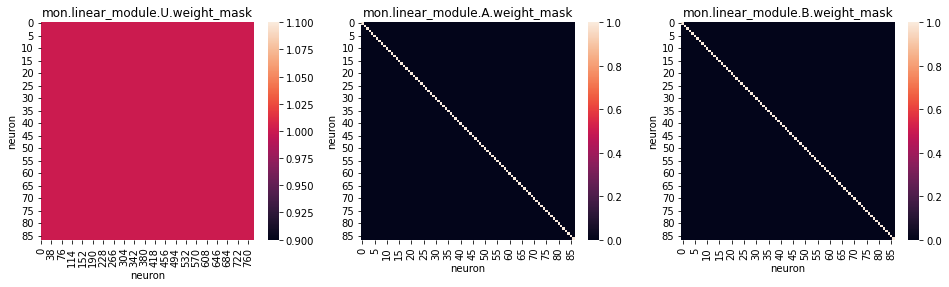

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(22,4))
fig_id = 0
for i, (name, mask) in enumerate(model.named_buffers()):
    if 'weight' in name:
        fig_id += 1
        ax = fig.add_subplot(1, 4, fig_id)
        ax = sns.heatmap(mask.data.cpu())
        ax.set_title(name)
        ax.set_ylabel('neuron')
        ax.set_xlabel('neuron')
        # break
# plt.savefig(saved_path)

In [4]:
10**-0.99

0.10232929922807542

## Grasp

In [3]:
trainLoader, testLoader = train.mnist_loaders(train_batch_size=128, test_batch_size=400)

model = train.SingleFcNet(sp.MONPeacemanRachford,
                        in_dim=28**2,
                        out_dim=10,
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0,
                        is_pruning=True)

# print('Pruning with {} for {} epochs.'.format(args.pruner, args.prune_epochs))
masked_parameters_ = masked_parameters(model)
pruner = GraSP(masked_parameters_)

compression = 0.5
# args.compression = 10**(arg.compression)
sparsity = 10**(-float(compression))
print('sparsity is \t ', str(1 - sparsity))
prune_loop(model, nn.CrossEntropyLoss(), pruner, trainLoader, 'cpu', sparsity, schedule='exponential', scope='local', epochs=1,
               reinitialize=False, train_mode=False, shuffle=False, invert=False,)

train.train(trainLoader, testLoader,
            model,
            max_lr=1e-3,
            lr_mode='step',
            step=10,
            change_mo=False,
            epochs=10,
        #     epochs=1,
            print_freq=100,
            tune_alpha=True)


C:\Users\pvh16\anaconda3\envs\pvh\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


MONLeakyReLU
sparsity is 	  0.683772233983162


  0%|          | 0/1 [00:01<?, ?it/s]

(tensor([[ 9.5360e-01,  4.4894e-01, -1.3972e-03,  ...,  5.2321e-01,
          3.2526e-02, -2.9642e-03],
        [ 5.2334e-01, -3.6914e-04, -1.4419e-02,  ...,  4.0771e-01,
          2.6533e-02, -8.1759e-03],
        [ 8.6392e-01, -3.5234e-03, -3.7098e-03,  ...,  6.9011e-02,
          5.4052e-01,  4.9280e-01],
        ...,
        [ 2.9256e-01,  5.4894e-01, -9.0002e-03,  ...,  5.8832e-01,
          2.7571e-01, -1.0619e-03],
        [ 3.8346e-01,  4.2708e-01, -1.3432e-03,  ..., -2.0200e-03,
          3.0932e-01,  1.6118e-01],
        [ 1.0801e+00,  1.3852e-01, -2.7901e-03,  ..., -1.2355e-03,
          4.1396e-01, -4.1432e-03]], grad_fn=<LeakyReluBackward0>),)
Updated 2


RuntimeError: expected scalar type __int64 but found float

In [5]:
z = torch.rand((3,4))
z

tensor([[0.3167, 0.1010, 0.8924, 0.8326],
        [0.9371, 0.6876, 0.0982, 0.4602],
        [0.9460, 0.1841, 0.0445, 0.7532]])

In [6]:
for z_ in z:
    for z__ in z_:
        if z__ > 0:
            print(z__)

tensor(0.3167)
tensor(0.1010)
tensor(0.8924)
tensor(0.8326)
tensor(0.9371)
tensor(0.6876)
tensor(0.0982)
tensor(0.4602)
tensor(0.9460)
tensor(0.1841)
tensor(0.0445)
tensor(0.7532)


In [9]:
z[0] > 0 

tensor([True, True, True, True])

In [7]:
tuple(torch.ones_like(z_).type_as(z[0]) if (z_>0) else torch.ones_like(z_)*0.01.type_as(z[0]) for z_ in z)

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [8]:
83346*10**(-0.95)

9351.575009225146

In [6]:
model

SingleFcNet(
  (mon): MONPeacemanRachford(
    (linear_module): MaskedMONSingleFc(
      (U): Linear(in_features=784, out_features=87, bias=True)
      (A): Linear(in_features=87, out_features=87, bias=False)
      (B): Linear(in_features=87, out_features=87, bias=False)
    )
    (nonlin_module): MONReLU()
  )
  (Wout): Linear(in_features=87, out_features=10, bias=True)
)

## Synflow

In [3]:
trainLoader, testLoader = train.mnist_loaders(train_batch_size=128, test_batch_size=400)

model = train.SingleFcNet(sp.MONPeacemanRachford,
                        in_dim=28**2,
                        out_dim=87,
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0,
                        is_pruning=True)

# print('Pruning with {} for {} epochs.'.format(args.pruner, args.prune_epochs))
masked_parameters_ = masked_parameters(model)
pruner = SynFlow(masked_parameters_)

compression = 0.1
# args.compression = 10**(arg.compression)
sparsity = 10**(-float(compression))
print('sparsity is \t ', str(1 - sparsity))
prune_loop(model, nn.CrossEntropyLoss(), pruner, trainLoader, 'cpu', sparsity, schedule='exponential', scope='local', epochs=1,
               reinitialize=False, train_mode=False, shuffle=False, invert=False,)

train.train(trainLoader, testLoader,
            model,
            max_lr=1e-3,
            lr_mode='step',
            step=10,
            change_mo=False,
            epochs=10,
        #     epochs=1,
            print_freq=100,
            tune_alpha=True)


C:\Users\pvh16\anaconda3\envs\pvh\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


sparsity is 	  0.2056717652757185


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

Masking checked
Locally Masking checked
threshold: 	  tensor(0.)
max 	  tensor(0.0100)
threshold: 	  tensor(0.)
max 	  tensor(0.1065)
threshold: 	  tensor(0.)
max 	  tensor(0.0631)
ERROR: 58779.0 prunable parameters remaining, expected 66204.08105132997


NameError: name 'quit' is not defined

# Masked Single convolution MON, CIFAR-10

In [5]:
trainLoader, testLoader = train.cifar_loaders(train_batch_size=128, test_batch_size=400, augment=False)

model = train.MultiConvNet(sp.MONPeacemanRachford,
                        in_dim=32,
                        in_channels=3,
                        conv_sizes=(16,32,60),
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0,
                        is_pruning=True)

# print('Pruning with {} for {} epochs.'.format(args.pruner, args.prune_epochs))
masked_parameters_ = masked_parameters(model)
pruner = Rand(masked_parameters_)

compression = 3

# args.compression = 10**(arg.compression)
sparsity = 10**(-float(compression))
prune_loop(model, None, pruner, None, 'cpu', sparsity, schedule='exponential', scope='global', epochs=1,
               reinitialize=False, train_mode=False, shuffle=False, invert=False,)


train.train(trainLoader, testLoader,
            model,
        max_lr=1e-2,
        lr_mode='step',
        step=10,
        change_mo=False,
#         epochs=40,
        epochs=1,
        print_freq=100,
        tune_alpha=True)

Files already downloaded and verified


100%|██████████| 1/1 [00:00<00:00, 277.53it/s]


Masking checked
Globally masking checked


AttributeError: module 'torch' has no attribute 'rfft'

In [6]:
trainLoader, testLoader = train.cifar_loaders(train_batch_size=128, test_batch_size=400, augment=False)

model = train.MultiConvNet(sp.MONPeacemanRachford,
                        in_dim=32,
                        in_channels=3,
                        conv_sizes=(64,128,128),
                        alpha=1.0,
                        max_iter=300,
                        tol=1e-2,
                        m=1.0,
                        is_pruning=True)

# print('Pruning with {} for {} epochs.'.format(args.pruner, args.prune_epochs))
masked_parameters_ = masked_parameters(model)
pruner = Rand(masked_parameters_)

sparsity = 1 
print('Sparsity: \t ', 1 - sparsity)
prune_loop(model, None, pruner, None, 'cpu', sparsity, schedule='exponential', scope='global', epochs=1,
               reinitialize=False, train_mode=False, shuffle=False, invert=False,)

##### Remove A or B ##### 
with torch.no_grad():
    # model.mon.linear_module.A.weight_mask = torch.zeros_like(model.mon.linear_module.A.weight_mask) + torch.eye(model.mon.linear_module.A.weight_mask.shape[0])
    # model.mon.linear_module.B.weight_mask = torch.zeros_like(model.mon.linear_module.B.weight_mask) + torch.eye(model.mon.linear_module.B.weight_mask.shape[0])
    # model.mon.linear_module.A.weight_mask = torch.zeros_like(model.mon.linear_module.A.weight_mask)
    # model.mon.linear_module.B.weight_mask = torch.zeros_like(model.mon.linear_module.B.weight_mask)
    for n, m in model.named_buffers():
        if 'A' in n:
            m.copy_(torch.zeros_like(m))


train.train(trainLoader, testLoader,
        model,
        max_lr=0.05,
        lr_mode='1cycle',
        change_mo=True,
#         epochs=65,
        epochs=10,
        print_freq=100,
        tune_alpha=True)

Files already downloaded and verified
Sparsity: 	  0


100%|██████████| 1/1 [00:00<00:00, 142.82it/s]

Masking checked
Globally masking checked


AttributeError: module 'torch' has no attribute 'rfft'